## ts.derivative

### ts.derivative() 

In [1]:
# first you should import the third-party python modules which you'll use later on
# the first line enables that figures are shown inline, directly in the notebook
%pylab inline
import os
from os import path
import sys
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from shyft.time_series import Calendar
from shyft.time_series import deltahours
from shyft.time_series import TimeAxis
from shyft.time_series import point_interpretation_policy as fx_policy
from shyft.time_series import DoubleVector
from shyft.time_series import TsVector
from shyft.time_series import TimeSeries
from shyft.time_series import derivative_method


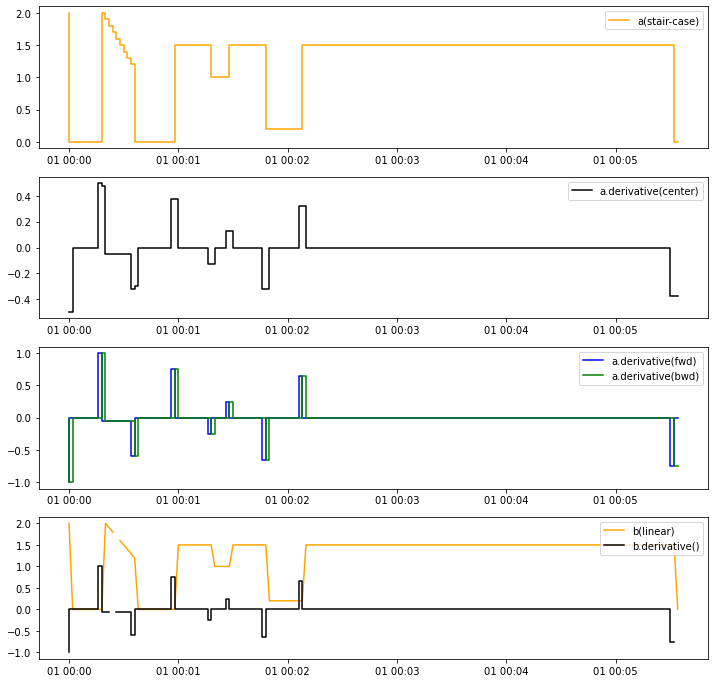

In [3]:
# demo ts.derivative

utc = Calendar()
t0 = utc.time(2016, 9, 1)
delta = 2
n = 7*24

ta = TimeAxis(t0, delta, n)

# generate a source ts, with some spikes, to demonstrate the response of the filter
ts_values = np.arange(n,dtype=np.float64)
ts_values[:]=0.0
ts_values[0]=2.0
ts_values[10] = 2.0
ts_values[11] = 1.9
ts_values[12] = 1.8
ts_values[13] = 1.7
ts_values[14] = 1.6
ts_values[15] = 1.5
ts_values[16] = 1.4
ts_values[17] = 1.3
ts_values[18:19] = 1.2
ts_values[30:-1] = 1.5
ts_values[40:45] = 1.0
ts_values[55:65] = 0.2

a = TimeSeries(ta=ta, values=DoubleVector.from_numpy(ts_values), point_fx=fx_policy.POINT_AVERAGE_VALUE)

da = a.derivative() # default derivative_method.CENTER
da_fwd = a.derivative(method=derivative_method.FORWARD)
da_bwd = a.derivative(method=derivative_method.BACKWARD)

b = TimeSeries(ta=ta, values=DoubleVector.from_numpy(ts_values), point_fx=fx_policy.POINT_INSTANT_VALUE)
b.set(13,float('nan')) # insert a nan into the sequence
db = b.derivative() # linear, always using segments derivateive

# now this is done, - we can now plot the results
common_timestamps = [dt.datetime.utcfromtimestamp(p) for p in ta.time_points][:-1]

fig, ax = plt.subplots(figsize=(12,12))
plt.subplot(411)
plt.step(common_timestamps, a.values, label='a(stair-case)',color='orange') 
plt.legend(loc=1)
plt.subplot(412)
plt.step(common_timestamps, da.values, label='a.derivative(center)',color='black')
plt.legend(loc=1)
plt.subplot(413)
plt.step(common_timestamps, da_fwd.values, label='a.derivative(fwd)',color='blue')
plt.step(common_timestamps, da_bwd.values, label='a.derivative(bwd)',color='green')
plt.legend(loc=1)
plt.subplot(414)
plt.plot(common_timestamps, b.values, label='b(linear)',color='orange') 
plt.step(common_timestamps, db.values, label='b.derivative()',color='black')
plt.legend(loc=1)


In [4]:
db.values.to_numpy()

array([-1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        1.  , -0.05, -0.05,   nan,   nan, -0.05, -0.05, -0.05, -0.05,
       -0.6 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
       -0.65,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.65,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [5]:
b.values.to_numpy()

array([2. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 1.9, 1.8,
       nan, 1.6, 1.5, 1.4, 1.3, 1.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1. , 1. , 1. , 1. , 1. , 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5,
       1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 0. ])